# Intoduction to Chess Analysis 
- Exploring the dataset https://www.kaggle.com/datasets/robikscube/chesscom-top-50-archive

In [ ]:
!pip install nb_black chess -q

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chess
import chess.pgn

#from glob import glob


pd.set_option("display.max_columns", 500)
plt.style.use('seaborn-v0_8-colorblind')
pal = sns.color_palette()

In [56]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


# Load in Data

In [4]:
df = pd.read_parquet('D:\\DataScience\\DataSets\\Chess_DataSet\\archive (1)\\twic_master.parquet')

In [5]:
df.head()

,twic_number,White,Black,Date,EventDate,Event,Result,mainline_moves,Site,Online,Round,ECO,Opening,WhiteFideId,BlackFideId,WhiteElo,BlackElo,Variation,WhiteTitle,BlackTitle,WhiteTeam,BlackTeam,EventType,FEN,SetUp,Variant,Board,PlyCount,EventCategory
0,1260,"Tukhaev,A","Carlsen,M",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. e4 c5 2. Nf3 Nc6 3. d4 cxd4 4. Nxd4 Nf6 5. ...,St Petersburg RUS,False,1.1,B33,Sicilian,14109476,1503014,2527,2835,"Pelikan, Chelyabinsk variation",GM,GM,None,None,None,None,None,None,None,None,None
1,1260,"Nakamura,Hi","Teske,H",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. Nf3 Nf6 2. g3 d5 3. Bg2 g6 4. c4 dxc4 5. Na...,St Petersburg RUS,False,1.2,A05,Reti opening,2016192,4611500,2746,2483,None,GM,GM,None,None,None,None,None,None,None,None,None
2,1260,"Tari,A","Artemiev,V",2018-12-26,2018.12.26,World Rapid 2018,0-1,1. e4 c5 2. Nf3 d6 3. Bb5+ Bd7 4. c4 Nc6 5. d4...,St Petersburg RUS,False,1.3,B52,Sicilian,1510045,24101605,2620,2709,"Canal-Sokolsky attack, 3...Bd7",GM,GM,None,None,None,None,None,None,None,None,None
3,1260,"Fedoseev,Vl3","Tregubov,P",2018-12-26,2018.12.26,World Rapid 2018,1/2-1/2,1. e4 e5 2. Nf3 Nf6 3. Nxe5 d6 4. Nd3 Nxe4 5. ...,St Petersburg RUS,False,1.4,C42,Petrov's defence,24130737,4115341,2719,2592,None,GM,GM,None,None,None,None,None,None,None,None,None
4,1260,"Hovhannisyan,R","Aronian,L",2018-12-26,2018.12.26,World Rapid 2018,1-0,1. e4 g6 2. d4 Bg7 3. Nc3 c6 4. Nf3 d6 5. h3 N...,St Petersburg RUS,False,1.5,B06,Robatsch defence,13302507,13300474,2637,2765,"two knights, Suttles variation",GM,GM,None,None,None,None,None,None,None,None,None


# Who Are The Most Frequent PLayers In The Archive

In [6]:
pd.concat([df['White'], df['Black']]).value_counts().head()

Nakamura,Hi     4688
Sarana,A        3537
Andreikin,D     3103
Kamsky,G        3091
Fedoseev,Vl3    3031
Name: count, dtype: int64

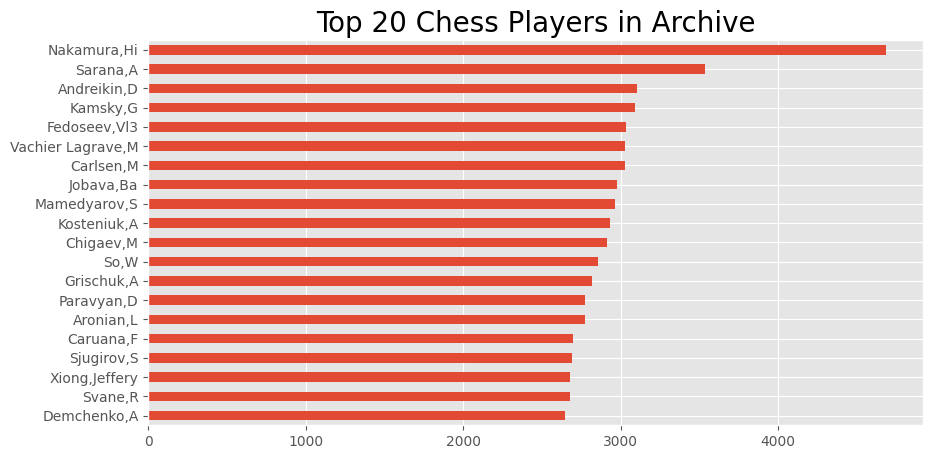

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
pd.concat([df['White'], df['Black']]).value_counts(ascending=True).tail(20).plot(kind='barh', ax=ax)
ax.set_title('Top 20 Chess Players in Archive', fontsize = 20)
plt.show()

## What Were The Top Opnings Each Year?

In [8]:
df['Year'] = df['Date'].dt.year
df = df.query('2023 > Year > 2012')

In [11]:
df['Year'].unique()

array([2018, 2017, 2015, 2014, 2020, 2016, 2013, 2022, 2021, 2019],
      dtype=int32)

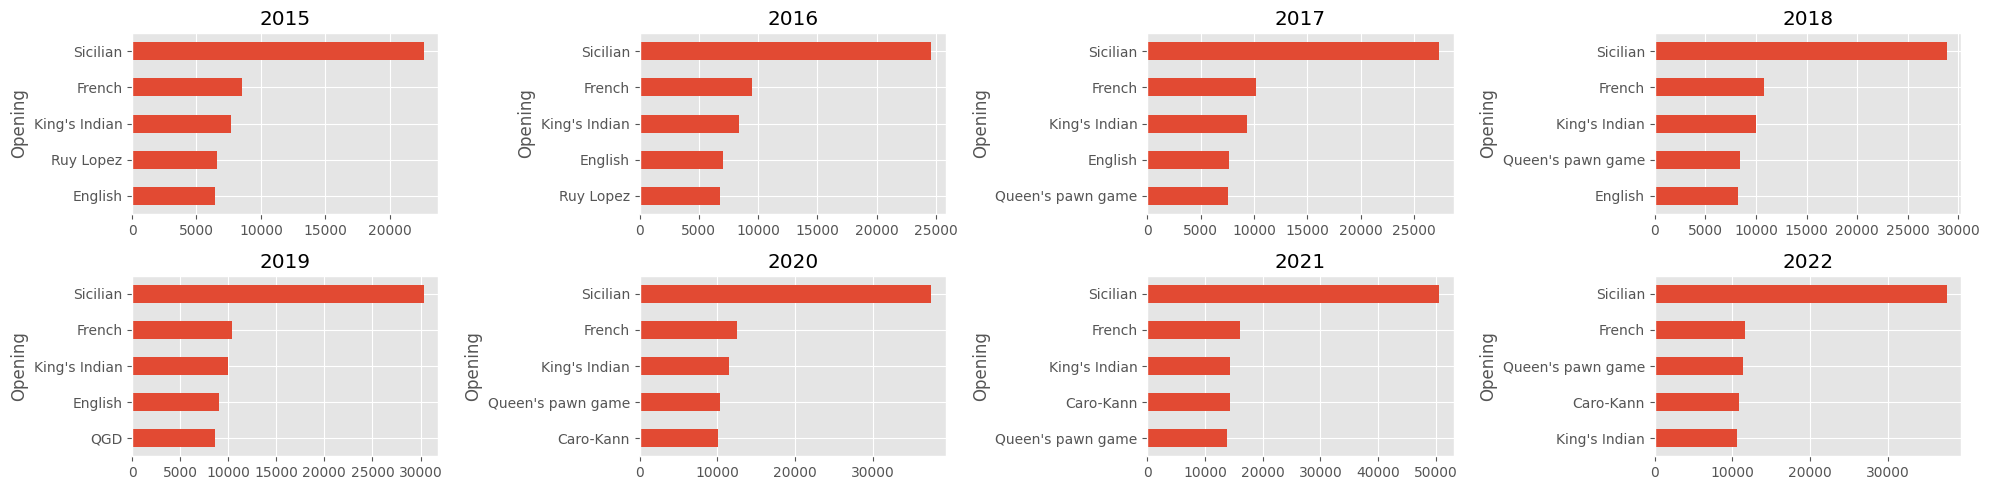

In [36]:
fig, axs = plt.subplots(2, 4 , figsize=(20, 5))
axs = axs.flatten()
for i, myyear in enumerate (range(2015, 2023)):
    #myyear = 2018
    df.query("Year == @myyear")["Opening"].value_counts(ascending=True).tail(5).plot(kind='barh', title=myyear, ax=axs[i])
plt.tight_layout()
plt.show()

# What %  of Games in the Archive were Online over time?

In [37]:
df['Week'] = df['Date'].dt.isocalendar().week

In [ ]:
df = df.sort_values('Date')

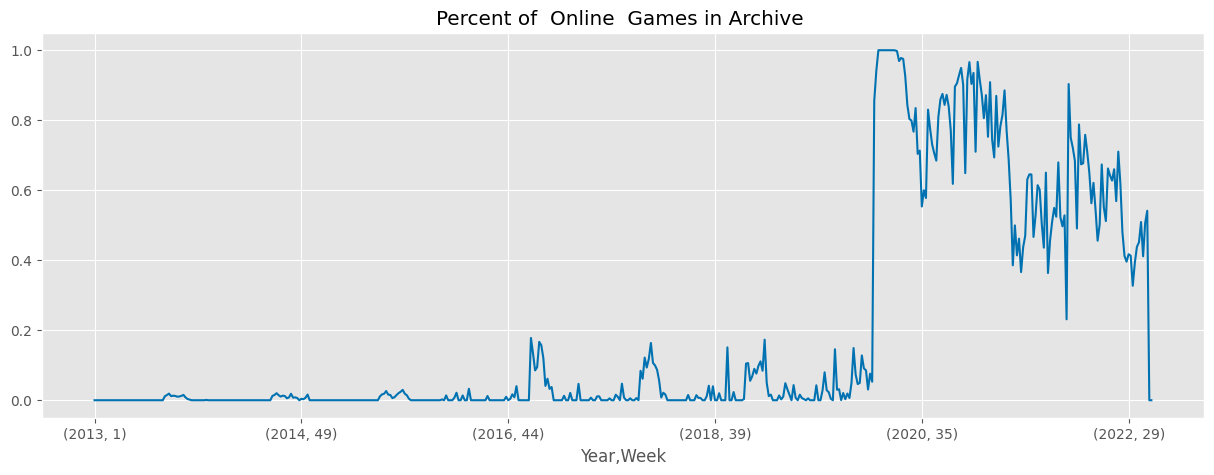

In [59]:
fig, axs = plt.subplots(figsize= (15,5))
df.groupby(['Year' , 'Week'])['Online'].mean().plot(title='Percent of  Online  Games in Archive ')
plt.show()

# Use Chess Package to Review Game
- can we find biggest upset

In [52]:
df_ = (df.dropna(subset=['BlackElo', 'WhiteElo']).astype({'BlackElo': 'int', 'WhiteElo':'int'}).copy())
df_['BlackElo'] - df_['WhiteElo']

0          308
1         -263
2           89
3         -127
4          128
          ... 
1971314    -55
1971315    139
1971316     16
1971317    229
1971318     67
Length: 1768600, dtype: int64

# Classify By Time Controls

In [4]:
tc_map = {}
for tc in df["TimeControl"].unique():
    tc_int = int(tc.split("+")[0].split("/")[-1])
    tc_map[tc] = "Daily"
    if tc_int <= 60 * 120:
        tc_map[tc] = "Rapid"
    if tc_int <= 60 * 5:
        tc_map[tc] = "Blitz"
    if tc_int <= 60:
        tc_map[tc] = "Bullet"

df["RatingGroup"] = df["TimeControl"].map(tc_map)

# EDA of Top Ratings

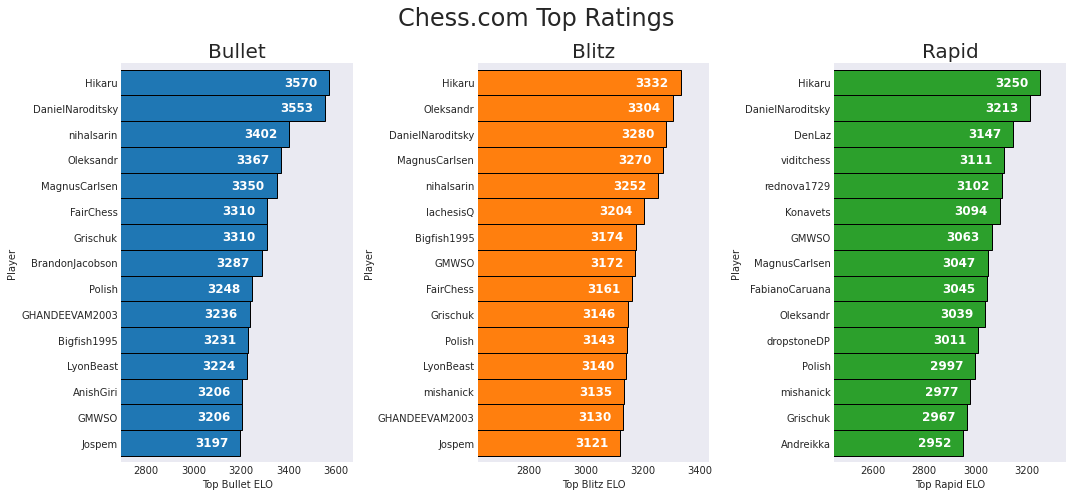

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))

pad_l = 500
pad_r = 100
for i, group in enumerate(["Bullet", "Blitz", "Rapid"]):
    d_temp = (
        df.query("RatingGroup == @group")
        .query('Variant != "None"')
        .groupby("main_player")["PlayerELO"]
        .max()
        .sort_values()
        .tail(15)
    )
    ax = d_temp.plot(kind="barh", width=1, edgecolor="black", ax=axs[i], color=pal[i])
    ax.set_title(f"{group}", fontsize=20)
    for bars in ax.containers:
        ax.bar_label(bars, padding=-45, fontsize=12, color="white", weight="bold")
    ax.set_ylabel("Player")
    ax.set_xlabel(f"Top {group} ELO")
    ax.set_xlim(d_temp.min() - pad_l, d_temp.max() + pad_r)
fig.suptitle("Chess.com Top Ratings", fontsize=24)
plt.tight_layout()
plt.show()

In [6]:
top_ratings = (
    df.groupby("main_player")["PlayerELO"]
    .max()
    .to_frame("top_rating")
    .sort_values("top_rating", ascending=False)
    .reset_index()
)
top_ratings["games_played"] = top_ratings["main_player"].map(
    df["main_player"].value_counts().to_dict()
)

# Look at Top 5 As if they were stocks

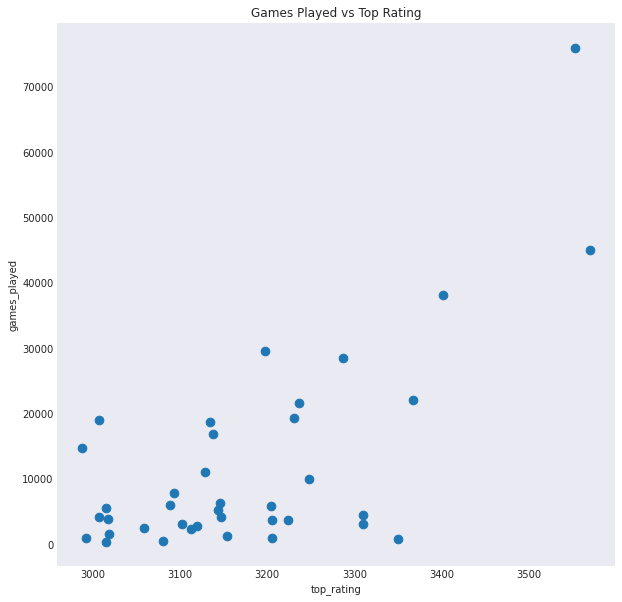

In [7]:
top_ratings.plot(
    x="top_rating",
    y="games_played",
    kind="scatter",
    title="Games Played vs Top Rating",
    figsize=(10, 10),
    s=75,
)
plt.show()

## Plot Hikaru's Ratings by Time Control Groups

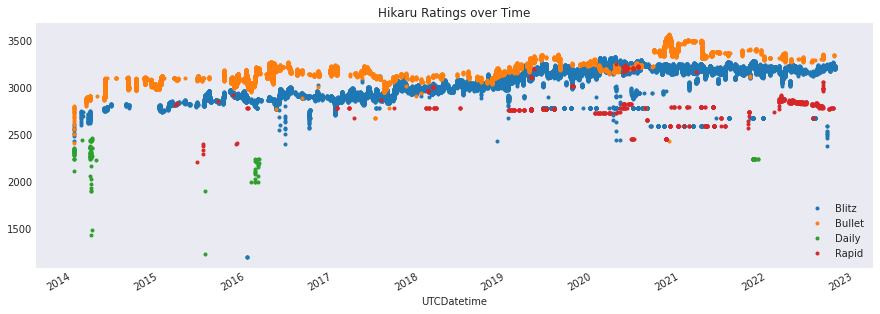

In [8]:
df.query('main_player == "Hikaru"').query('Variant != "None"').set_index(
    "UTCDatetime"
).groupby("RatingGroup")["PlayerELO"].plot(
    figsize=(15, 5), style=".", title="Hikaru Ratings over Time"
)
plt.legend()
plt.show()

# Top 5 with over 10k Games Minimum

In [9]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

top_10k = top_ratings.query("games_played > 10_000").reset_index(drop=True)

In [10]:
df = df.loc[df["Variant"].isna()].reset_index(drop=True).copy()

In [11]:
for player in top_10k["main_player"].values[:5]:
    playerdf = (
        df.query("main_player == @player")
        .query("PlayerELO > 2800")
        .query("RatingGroup == 'Bullet'")
        .sort_values("UTCDatetime")
        .groupby("UTCDate")["PlayerELO"]
        .agg(["first", "last", "max", "min"])
        .rename(columns={"first": "Open", "last": "Close", "max": "High", "min": "Low"})
    )

    fig = go.Figure(
        data=[
            go.Candlestick(
                x=playerdf.index,
                open=playerdf["Open"],
                high=playerdf["High"],
                low=playerdf["Low"],
                close=playerdf["Close"],
            )
        ]
    )

    fig.update_layout(
        margin=dict(l=20, r=20, t=60, b=20),
        height=500,
        paper_bgcolor="LightSteelBlue",
        title=f"{player} Bullet Stock",
    )

    fig.show()

# Stocks for Blitz

In [12]:
for player in top_10k["main_player"].values[:5]:
    playerdf = (
        df.query("main_player == @player")
        .query("PlayerELO > 2800")
        .query("RatingGroup == 'Blitz'")
        .sort_values("UTCDatetime")
        .groupby("UTCDate")["PlayerELO"]
        .agg(["first", "last", "max", "min"])
        .rename(columns={"first": "Open", "last": "Close", "max": "High", "min": "Low"})
    )

    fig = go.Figure(
        data=[
            go.Candlestick(
                x=playerdf.index,
                open=playerdf["Open"],
                high=playerdf["High"],
                low=playerdf["Low"],
                close=playerdf["Close"],
            )
        ]
    )

    fig.update_layout(
        margin=dict(l=20, r=20, t=60, b=20),
        height=500,
        paper_bgcolor="LightSteelBlue",
        title=f"{player} Blitz Stock",
    )

    fig.show()

# Bullet Openings
- Can we find an opening that is played rarely in bullet, but wins a large percent of the time?

In [13]:
import plotly.express as px

blitz_openings = (
    df.query("RatingGroup == 'Blitz'")
    .groupby("ECO")["Result"]
    .value_counts()
    .unstack()
    .fillna(0)
    .astype("int")
)

blitz_openings["times_played"] = blitz_openings.sum(axis=1)
blitz_openings["white_win_pct"] = blitz_openings["1-0"] / blitz_openings["times_played"]
blitz_openings = blitz_openings.reset_index()
px.scatter(
    x="white_win_pct",
    y="times_played",
    data_frame=blitz_openings.query("times_played > 500"),
    hover_data=["ECO"],
)

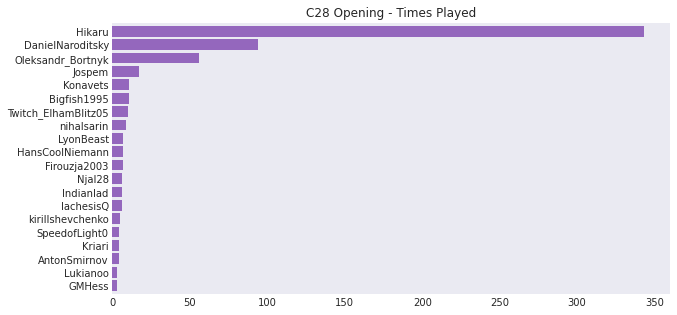

In [14]:
df.query("RatingGroup == 'Blitz'").query('ECO == "C28"')["White"].value_counts().head(
    20
).sort_values().plot(
    kind="barh",
    color=pal[4],
    title="C28 Opening - Times Played",
    figsize=(10, 5),
    width=0.8,
)
plt.show()

## Is it a good opening? Or is it just one Hikaru likes to play and he's really good?

# What we leaned today:
- Hikaru wins chess.com
- Best Blitz opening for white is the Vienna
- Hikaru likes this opening.